In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Naren\Desktop\data\Mall.csv")
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
x = df.iloc[:,[3,4]].values

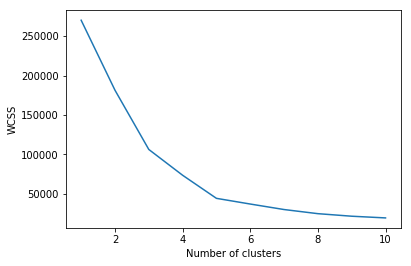

In [14]:
# find the optimal number of clusters using elbow method

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
plt.plot(range(1,11),WCSS)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [18]:
# since elbow occured at 5, hence the optimal number of clusters for the mall data is 5 

model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

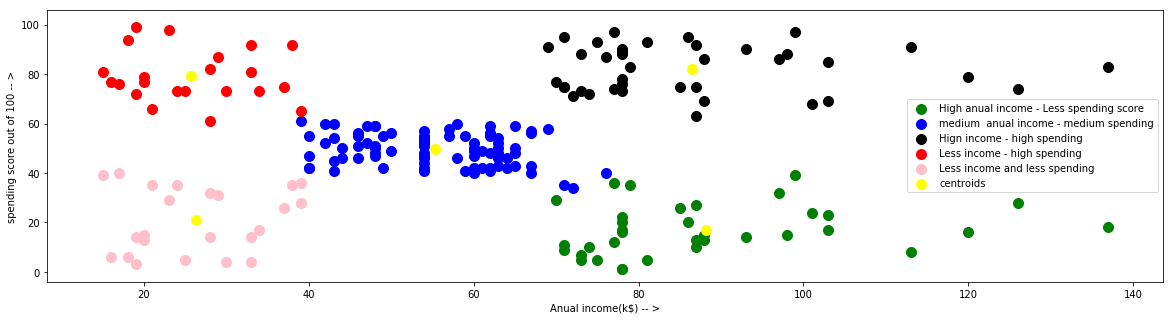

In [34]:
plt.figure(figsize = (20,5))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 100, c = 'green', label = "High anual income - Less spending score")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 100, c = 'blue', label = "medium  anual income - medium spending")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 100, c = 'black', label = "Hign income - high spending")
plt.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],s = 100, c = 'red', label = "Less income - high spending")
plt.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],s = 100, c = 'pink', label = "Less income and less spending")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Anual income(k$) -- >")
plt.ylabel("spending score out of 100 -- >")
plt.legend()
plt.show()